In [1]:
%matplotlib inline
%run ../../path_import.py
import numpy as np
import matplotlib.pyplot as plt
from plots import *
from utils import *
from training import *
from model_mu import *
import time
import probtorch
print('probtorch:', probtorch.__version__, 
      'torch:', torch.__version__, 
      'cuda:', torch.cuda.is_available())

probtorch: 0.0+5a2c637 torch: 1.0.0 cuda: True


In [2]:
Data = torch.from_numpy(np.load('../rings_fixed_radius/obs.npy')).float()
## Data Parameters
N = 300
K = 3
D = 2
FIXED_RADIUS = 1.5
## Model Parameters
MCMC_SIZE = 10
SAMPLE_SIZE = 10
NUM_HIDDEN_GLOBAL = 8
NUM_HIDDEN_LOCAL = 64
STAT_SIZE = 8
NUM_LATENTS =  D
## Training Parameters
BATCH_SIZE = 20
NUM_EPOCHS = 100
LEARNING_RATE = 1e-3
CUDA = torch.cuda.is_available()
PATH = 'ag-mu-idw-v1'
DEVICE = torch.device('cuda:1')

In [3]:
enc_mu, enc_z, optimizer = initialize(NUM_HIDDEN_GLOBAL, STAT_SIZE, NUM_HIDDEN_LOCAL, K, D, CUDA, DEVICE, LEARNING_RATE)

In [4]:
# enc_mu.load_state_dict(torch.load("../weights/enc-mu-%s" % PATH))
# enc_z.load_state_dict(torch.load("../weights/enc-z-%s" % PATH))

In [5]:
train(Eubo_mu, enc_mu, enc_z, optimizer, Data, FIXED_RADIUS, K, NUM_EPOCHS, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE, PATH, CUDA, DEVICE)

epoch=0, EUBO=-65522.798, ELBO=-267330.380, ESS=2.453 (15s)
epoch=1, EUBO=-20306.496, ELBO=-136028.507, ESS=3.267 (15s)
epoch=2, EUBO=-9907.272, ELBO=-47493.260, ESS=3.875 (15s)
epoch=3, EUBO=-6068.871, ELBO=-21360.526, ESS=4.160 (15s)
epoch=4, EUBO=-4180.309, ELBO=-13714.826, ESS=4.335 (14s)
epoch=5, EUBO=-2892.863, ELBO=-9696.653, ESS=4.434 (14s)
epoch=6, EUBO=-1911.733, ELBO=-7078.602, ESS=4.493 (14s)
epoch=7, EUBO=-1428.341, ELBO=-5635.120, ESS=4.542 (14s)
epoch=8, EUBO=-1236.820, ELBO=-4755.210, ESS=4.577 (14s)
epoch=9, EUBO=-1045.462, ELBO=-4104.012, ESS=4.609 (15s)
epoch=10, EUBO=-961.519, ELBO=-3713.500, ESS=4.648 (15s)
epoch=11, EUBO=-864.986, ELBO=-3414.123, ESS=4.675 (15s)
epoch=12, EUBO=-863.981, ELBO=-3267.731, ESS=4.703 (14s)
epoch=13, EUBO=-835.109, ELBO=-3104.297, ESS=4.725 (14s)
epoch=14, EUBO=-800.420, ELBO=-2987.801, ESS=4.757 (14s)
epoch=15, EUBO=-637.673, ELBO=-2725.267, ESS=4.773 (15s)
epoch=16, EUBO=-723.400, ELBO=-2753.532, ESS=4.796 (14s)
epoch=17, EUBO=-729.50

In [6]:
torch.save(enc_mu.state_dict(), "../weights/enc-mu-%s" % PATH)
torch.save(enc_z.state_dict(), "../weights/enc-z-%s" % PATH)

CPU times: user 4.37 s, sys: 36 ms, total: 4.41 s
Wall time: 4.42 s


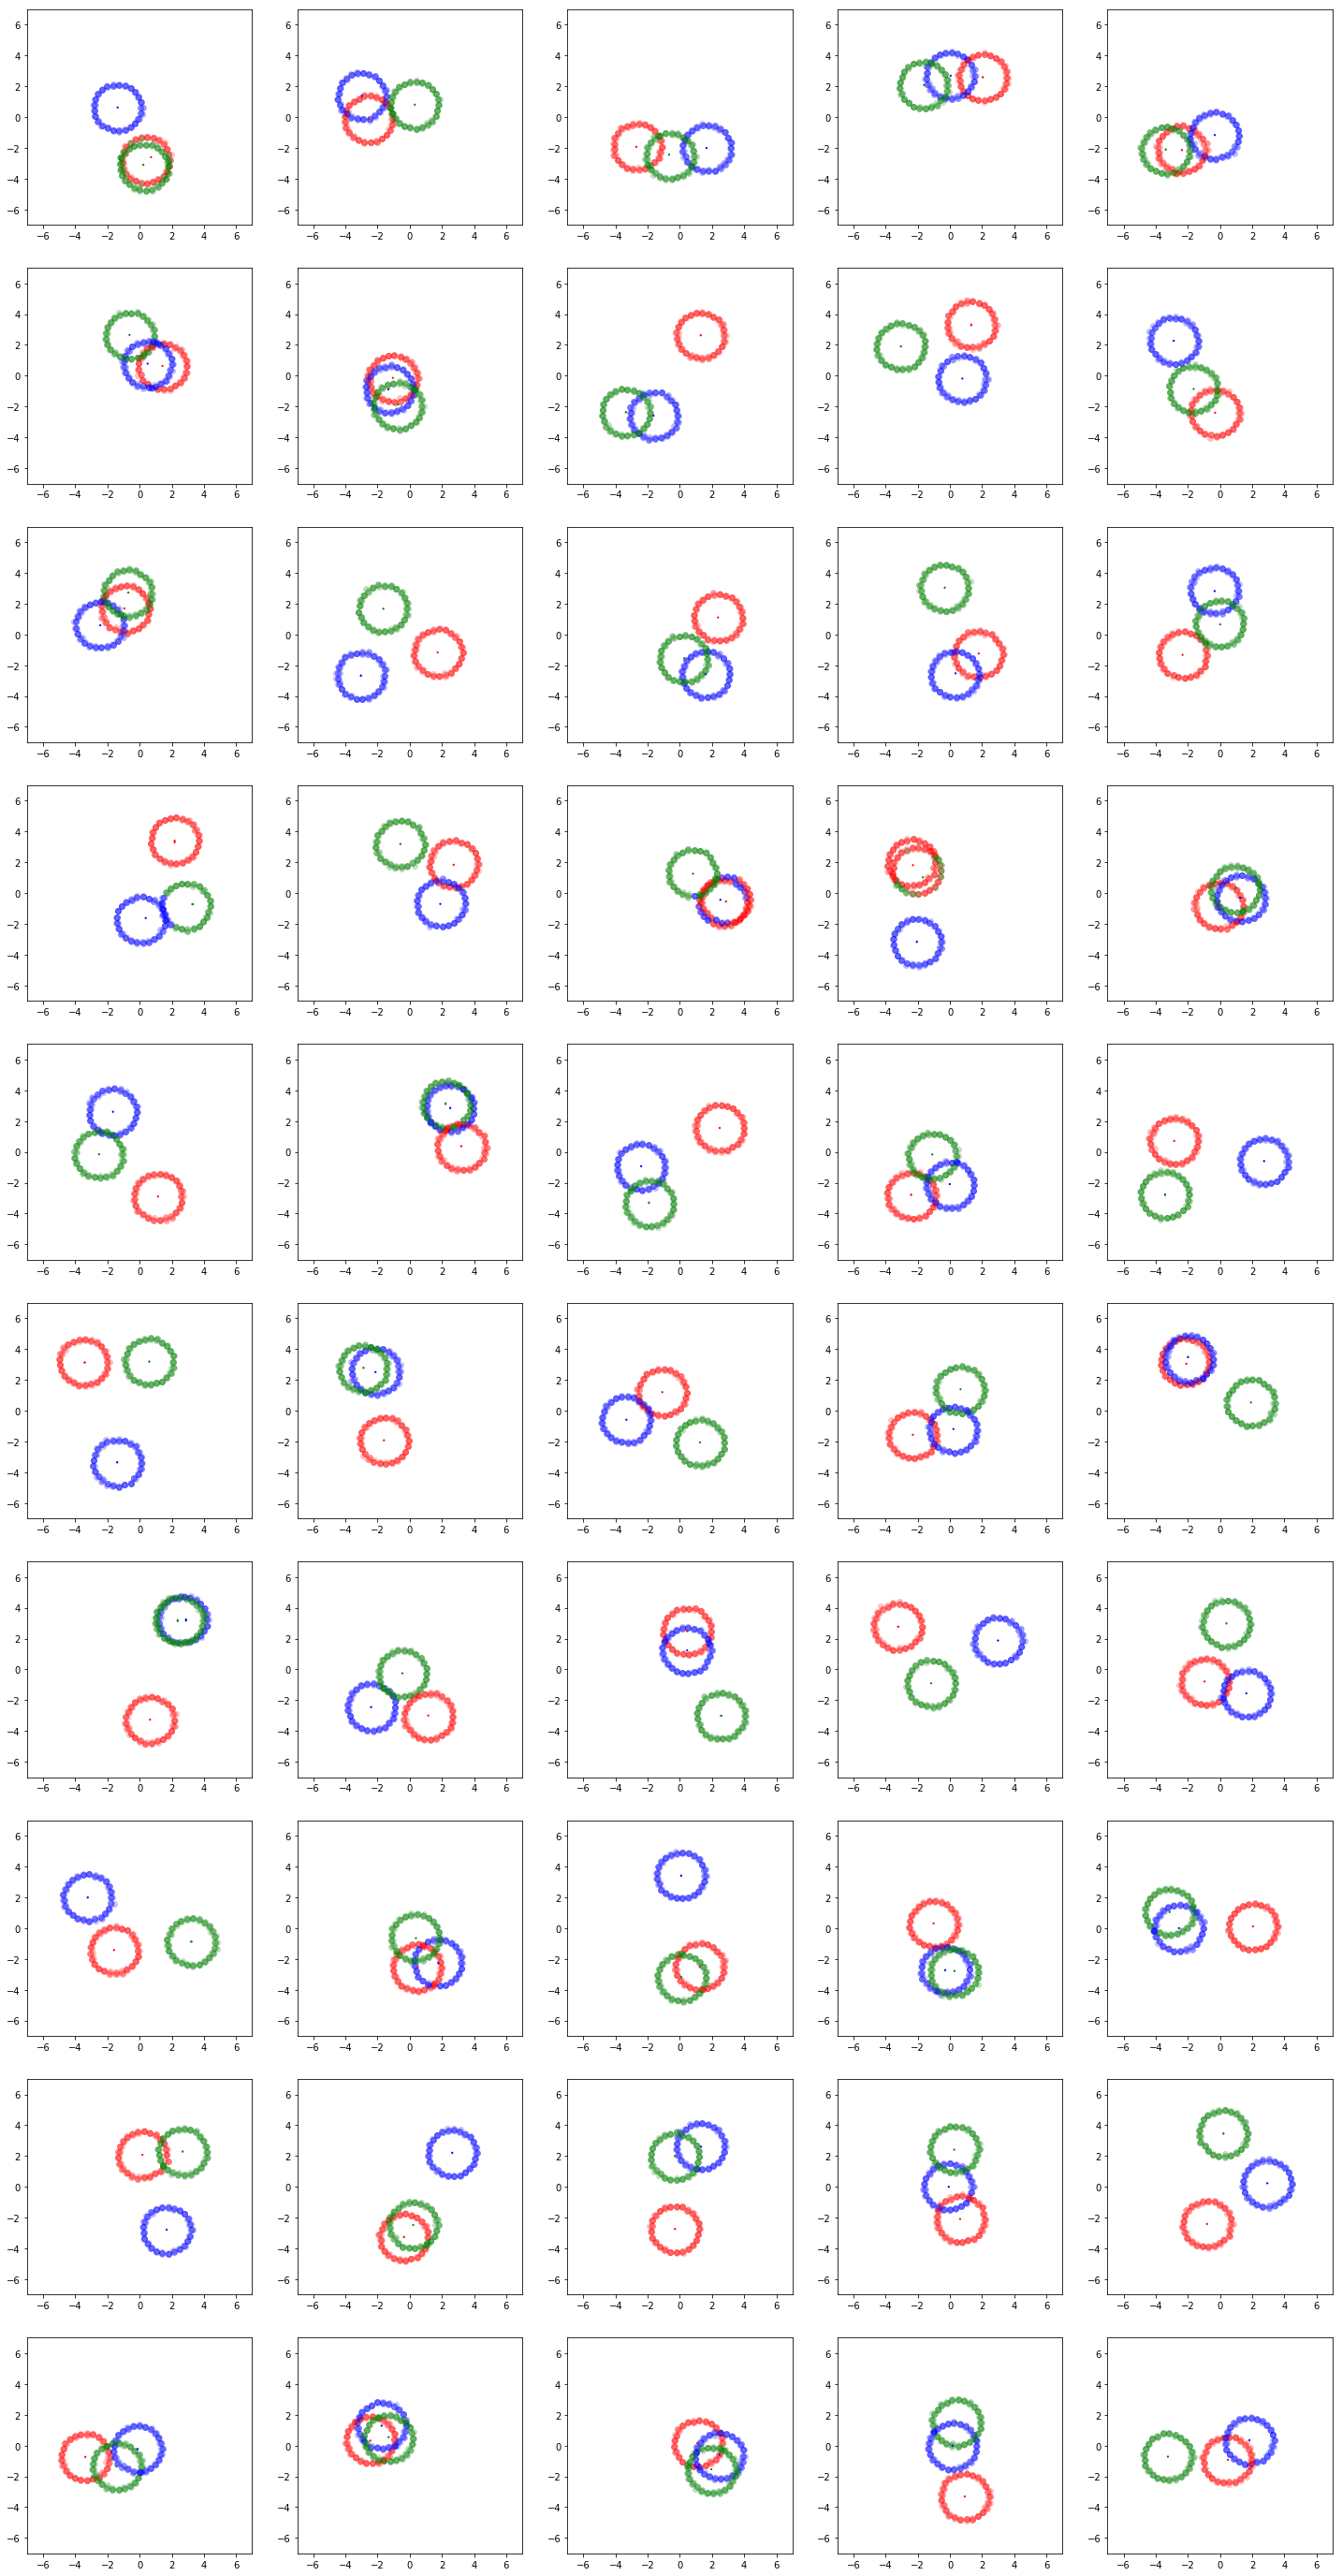

In [7]:
BATCH_SIZE_TEST = 50
obs, q_mu, q_z = test(Eubo_mu, enc_mu, enc_z, Data, FIXED_RADIUS, K, MCMC_SIZE, SAMPLE_SIZE, BATCH_SIZE_TEST, CUDA, DEVICE)
%time plot_samples(obs, q_mu, q_z, K, PATH)